In [4]:

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [10]:
df = read_csv(r'bitcoin.csv')
df.head(5)

,unix,date,symbol,open,high,low,close,Volume AAVE,Volume BTC
0,1650931200,2022-04-26 00:00:00,AAVE/BTC,0.004177,0.004177,0.004177,0.004177,0.000000,0.000000
1,1650844800,2022-04-25 00:00:00,AAVE/BTC,0.004096,0.004216,0.004096,0.004177,50.762300,0.212056
2,1650758400,2022-04-24 00:00:00,AAVE/BTC,0.004362,0.004362,0.004215,0.004226,48.148168,0.203488
3,1650672000,2022-04-23 00:00:00,AAVE/BTC,0.004388,0.004388,0.004388,0.004388,47.269320,0.207405
4,1650585600,2022-04-22 00:00:00,AAVE/BTC,0.004446,0.004449,0.004429,0.004435,115.005036,0.510014


In [11]:
import pandas as pd
import numpy as np
df_close = pd.DataFrame(df['close'])
df_close.index = pd.to_datetime(df['date'])

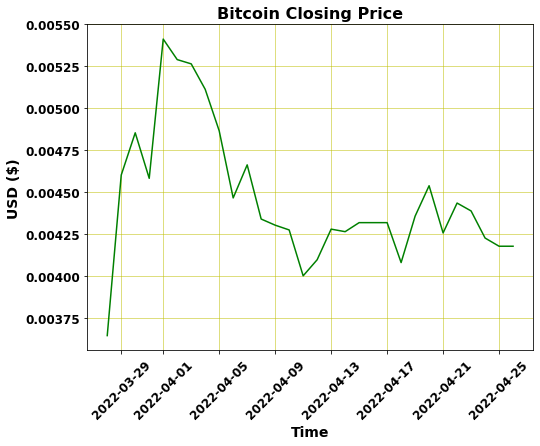

In [12]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt # data visualization
register_matplotlib_converters()

plt.figure(figsize=(8, 6))
plt.plot(df_close, color='g')
plt.title('Bitcoin Closing Price', weight='bold', fontsize=16)
plt.xlabel('Time', weight='bold', fontsize=14)
plt.ylabel('USD ($)', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)

In [13]:

def create_regressor_attributes(df, attribute, list_of_prev_t_instants) :
    
    """
    Ensure that the index is of datetime type
    Creates features with previous time instant values
    """
        
    list_of_prev_t_instants.sort()
    start = list_of_prev_t_instants[-1] 
    end = len(df)
    df['datetime'] = df.index
    df.reset_index(drop=True)

    df_copy = df[start:end]
    df_copy.reset_index(inplace=True, drop=True)

    for attribute in attribute :
            foobar = pd.DataFrame()

            for prev_t in list_of_prev_t_instants :
                new_col = pd.DataFrame(df[attribute].iloc[(start - prev_t) : (end - prev_t)])
                new_col.reset_index(drop=True, inplace=True)
                new_col.rename(columns={attribute : '{}_(t-{})'.format(attribute, prev_t)}, inplace=True)
                foobar = pd.concat([foobar, new_col], sort=False, axis=1)

            df_copy = pd.concat([df_copy, foobar], sort=False, axis=1)
            
    df_copy.set_index(['datetime'], drop=True, inplace=True)
    return df_copy

In [14]:
list_of_attributes = ['close']

list_of_prev_t_instants = []
for i in range(1,16):
    list_of_prev_t_instants.append(i)

list_of_prev_t_instants

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [15]:
df_new = create_regressor_attributes(df_close, list_of_attributes, list_of_prev_t_instants)
df_new.head()

,close,close_(t-1),close_(t-2),close_(t-3),close_(t-4),close_(t-5),close_(t-6),close_(t-7),close_(t-8),close_(t-9),close_(t-10),close_(t-11),close_(t-12),close_(t-13),close_(t-14),close_(t-15)
datetime,,,,,,,,,,,,,,,,
2022-04-11,0.004001,0.004097,0.004279,0.004264,0.004318,0.004318,0.004318,0.004080,0.004357,0.004538,0.004257,0.004435,0.004388,0.004226,0.004177,0.004177
2022-04-10,0.004275,0.004001,0.004097,0.004279,0.004264,0.004318,0.004318,0.004318,0.004080,0.004357,0.004538,0.004257,0.004435,0.004388,0.004226,0.004177
2022-04-09,0.004303,0.004275,0.004001,0.004097,0.004279,0.004264,0.004318,0.004318,0.004318,0.004080,0.004357,0.004538,0.004257,0.004435,0.004388,0.004226
2022-04-08,0.004339,0.004303,0.004275,0.004001,0.004097,0.004279,0.004264,0.004318,0.004318,0.004318,0.004080,0.004357,0.004538,0.004257,0.004435,0.004388
2022-04-07,0.004662,0.004339,0.004303,0.004275,0.004001,0.004097,0.004279,0.004264,0.004318,0.004318,0.004318,0.004080,0.004357,0.004538,0.004257,0.004435


In [45]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [46]:
input_layer = Input(shape=(15), dtype='float32')
dense1 = Dense(60, activation='linear')(input_layer)
dense2 = Dense(60, activation='linear')(dense1)
dropout_layer = Dropout(0.2)(dense2)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [47]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 60)                960       
_________________________________________________________________
dense_7 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 61        
Total params: 4,681
Trainable params: 4,681
Non-trainable params: 0
_________________________________________________________________


In [48]:
test_set_size = 0.05
valid_set_size= 0.05

df_copy = df_new.reset_index(drop=True)

df_test = df_copy.iloc[ int(np.floor(len(df_copy)*(1-test_set_size))) : ]
df_train_plus_valid = df_copy.iloc[ : int(np.floor(len(df_copy)*(1-test_set_size))) ]

df_train = df_train_plus_valid.iloc[ : int(np.floor(len(df_train_plus_valid)*(1-valid_set_size))) ]
df_valid = df_train_plus_valid.iloc[ int(np.floor(len(df_train_plus_valid)*(1-valid_set_size))) : ]


X_train, y_train = df_train.iloc[:, 1:], df_train.iloc[:, 0]
X_valid, y_valid = df_valid.iloc[:, 1:], df_valid.iloc[:, 0]
X_test, y_test = df_test.iloc[:, 1:], df_test.iloc[:, 0]

print('Shape of training inputs, training target:', X_train.shape, y_train.shape)
print('Shape of validation inputs, validation target:', X_valid.shape, y_valid.shape)
print('Shape of test inputs, test target:', X_test.shape, y_test.shape)

Shape of training inputs, training target: (13, 15) (13,)
Shape of validation inputs, validation target: (1, 15) (1,)
Shape of test inputs, test target: (1, 15) (1,)


In [49]:
from sklearn.preprocessing import MinMaxScaler

Target_scaler = MinMaxScaler(feature_range=(0.01, 0.99))
Feature_scaler = MinMaxScaler(feature_range=(0.01, 0.99))

X_train_scaled = Feature_scaler.fit_transform(np.array(X_train))
X_valid_scaled = Feature_scaler.fit_transform(np.array(X_valid))
X_test_scaled = Feature_scaler.fit_transform(np.array(X_test))

y_train_scaled = Target_scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_valid_scaled = Target_scaler.fit_transform(np.array(y_valid).reshape(-1,1))
y_test_scaled = Target_scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [50]:
model.fit(x=X_train_scaled, y=y_train_scaled, batch_size=5, epochs=3, verbose=1, validation_data=(X_valid_scaled, y_valid_scaled), shuffle=True)

Epoch 1/3
3/3 [==============================] - 1s 162ms/step - loss: 0.9632 - val_loss: 0.0012
Epoch 2/3
3/3 [==============================] - 0s 37ms/step - loss: 0.3462 - val_loss: 0.0073
Epoch 3/3
3/3 [==============================] - 0s 38ms/step - loss: 0.0938 - val_loss: 0.0153


In [51]:
y_pred = model.predict(X_test_scaled)

In [52]:
y_pred_rescaled = Target_scaler.inverse_transform(y_pred)

In [53]:
from sklearn.metrics import r2_score
y_test_rescaled =  Target_scaler.inverse_transform(y_test_scaled)
score = r2_score(y_test_rescaled, y_pred_rescaled)
print('R-squared score for the test set:', round(score,4))

R-squared score for the test set: nan


c:\users\maury\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [43]:
y_actual = pd.DataFrame(y_test_rescaled, columns=['Actual Close Price'])

y_hat = pd.DataFrame(y_pred_rescaled, columns=['Predicted Close Price'])

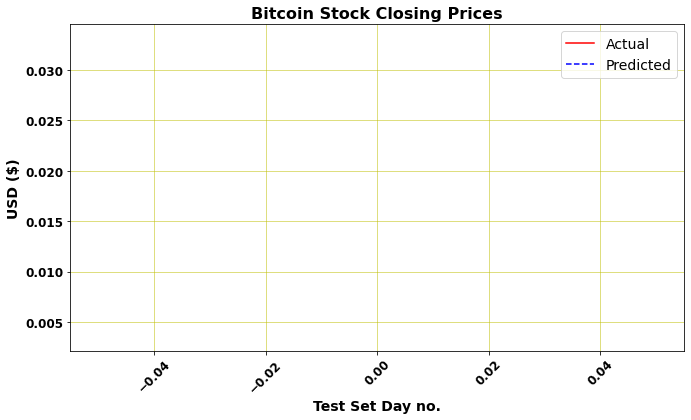

In [44]:
plt.figure(figsize=(11, 6))
plt.plot(y_actual, linestyle='solid', color='r')
plt.plot(y_hat, linestyle='dashed', color='b')

plt.legend(['Actual','Predicted'], loc='best', prop={'size': 14})
plt.title('Bitcoin Stock Closing Prices', weight='bold', fontsize=16)
plt.ylabel('USD ($)', weight='bold', fontsize=14)
plt.xlabel('Test Set Day no.', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth='0.5')
plt.show()